# Demo of Perfect Model Predictability Functions

This demo demonstrates `climpred`'s capabilities for a perfect-model framework ensemble simulation.

**What's a perfect-model framework simulation?**

A perfect-model framework uses a set of ensemble simulations that are based on a General Circulation Model (GCM) or Earth System Model (ESM) alone. There is *no* use of any reanalysis, reconstruction, or data product to initialize the decadal prediction ensemble. An arbitrary number of `members` are initialized from perturbed initial conditions (the "`ensemble`"), and the control simulation can be viewed as just another member.


**How to compare predictability skill score:**
As no observational data interferes with the random climate evolution of the model, we cannot use an observation-based reference for computing skill scores. Therefore, we can compare the members with one another (`m2m`), against the ensemble mean (`m2e`), or against the control (`m2c`). We can also compare the ensemble mean to the control (`e2c`). See the [comparisons](https://climpred.readthedocs.io/en/latest/comparisons.html) page for more information.

**When to use perfect-model frameworks:**

- You don't have a sufficiently long observational record to use as a reference.
- You want to avoid biases between model climatology and reanalysis climatology.
- You want to avoid sensitive reactions of biogeochemical cycles to disruptive changes in ocean physics due to assimilation.
- You want to delve into process understanding of predictability in a model without outside artifacts.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import climpred

**Load sample data**

Here we use a subset of ensembles and members from the MPI-ESM-LR (CMIP6 version) esmControl simulation of an early state. This corresponds to `vga0214` from year 3000 to 3300.

## 1-dimensional output

Our 1D sample output contains datasets of time series of certain spatially averaged `area` ('global', 'North_Atlantic') and temporally averaged `period` ('ym', 'DJF', ...) for some `lead` years (1, ..., 20).

`ds`: The ensemble dataset of all `members` (1, ..., 10), `inits` (initialization years: 3014, 3023, ..., 3257), `areas`, `periods`, and `lead` years.

`control`: The control dataset with the same areas and periods, as well as the years 3000 to 3299.

In [2]:
ds = climpred.tutorial.load_dataset('MPI-PM-DP-1D').isel(area=1, period=-1)
control = climpred.tutorial.load_dataset('MPI-control-1D').isel(area=1, period=-1)

ds['lead'].attrs = {'units': 'years'}

We'll sub-select annual means ('ym') of sea surface temperature ('tos') in the North Atlantic.

In [3]:
# Add to climpred PerfectModelEnsemble object.
pm = climpred.PerfectModelEnsemble(ds)
pm = pm.add_control(control)
pm

/Users/aaron.spring/Coding/climpred/climpred/utils.py:141: UserWarning: Assuming annual resolution due to numeric inits. Change init to a datetime if it is another resolution.
  "Assuming annual resolution due to numeric inits. "


climpred.PerfectModelEnsemble

<Initialized Ensemble>
Dimensions: (init: 12, lead: 20, member: 10)
Coordinates:
 * lead (lead) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
 period <U2 'ym'
 area <U14 'North_Atlantic'
 * init (init) object 3014-01-01 00:00:00 ... 3257-01-01 00:00:00
 * member (member) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
 tos (lead, init, member) float32 10.781249 10.917702 ... 10.894786
 sos (lead, init, member) float32 33.379833 33.366467 ... 33.48065
 AMO (lead, init, member) float32 0.07231695 0.1894327 ... 0.060747206 Initialized Ensemble Dimensions: init : 12 lead : 20 member : 10 Coordinates: (5) lead (lead) int64 1 2 3 4 5 6 7 ... 15 16 17 18 19 20 units : years array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20]) period () <U2 'ym' array('ym', dtype='<U2') area () <U14 'North_Atlantic' array('North_Atlantic', dtype='<U14') init (init) object 3014-01-01 00:00:00 ... 3257-01-... array([cftime.DatetimeProlepticGregorian(3014, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3023, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3045, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3061, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3124, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3139, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3144, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3175, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3178, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3228, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3237, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3257, 1, 1, 0, 0, 0, 0)], dtype=object) member (member) int64 0 1 2 3 4 5 6 7 8 9 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) Data variables: (3) tos (lead, init, member) float32 ... array([[[10.781249, 10.917702, ..., 10.897053, 10.843189],
 [10.727219, 10.813577, ..., 10.803096, 10.651206],
 ...,
 [10.294819, 10.539777, ..., 10.442225, 10.412181],
 [10.385962, 10.594727, ..., 10.409877, 10.403644]],

 [[11.026904, 10.881209, ..., 10.903457, 10.85706 ],
 [10.936329, 11.062461, ..., 10.968625, 11.082683],
 ...,
 [10.113186, 10.293538, ..., 10.450742, 10.182688],
 [10.549644, 10.482872, ..., 10.614776, 10.51542 ]],

 ...,

 [[10.877393, 10.962437, ..., 10.858264, 10.441303],
 [10.503685, 10.489896, ..., 11.052794, 10.790496],
 ...,
 [10.694736, 10.678864, ..., 10.324147, 10.555562],
 [10.533122, 10.690272, ..., 10.522203, 11.049645]],

 [[11.197919, 10.93896 , ..., 10.838304, 10.451338],
 [10.67775 , 10.550334, ..., 10.607387, 10.692555],
 ...,
 [10.642373, 10.502099, ..., 10.11778 , 10.391133],
 [10.826764, 10.684681, ..., 10.829444, 10.894786]]], dtype=float32) sos (lead, init, member) float32 ... array([[[33.379833, 33.366467, ..., 33.36124 , 33.32225 ],
 [33.377155, 33.373028, ..., 33.346344, 33.38318 ],
 ...,
 [33.217045, 33.2169 , ..., 33.24268 , 33.241886],
 [33.27586 , 33.298878, ..., 33.232338, 33.308716]],

 [[33.408016, 33.325253, ..., 33.42898 , 33.345768],
 [33.3932 , 33.400852, ..., 33.3288 , 33.398758],
 ...,
 [33.277046, 33.27699 , ..., 33.328503, 33.218845],
 [33.33428 , 33.243446, ..., 33.216988, 33.290936]],

 ...,

 [[33.39525 , 33.51696 , ..., 33.341 , 33.238438],
 [33.367573, 33.445225, ..., 33.315975, 33.344593],
 ...,
 [33.387165, 33.345234, ..., 33.189358, 33.299137],
 [33.420033, 33.389782, ..., 33.43263 , 33.552074]],

 [[33.36968 , 33.55584 , ..., 33.390663, 33.31099 ],
 [33.402542, 33.388348, ..., 33.343822, 33.431545],
 ...,
 [33.246838, 33.30958 , ..., 33.144096, 33.204456],
 [33.4219 , 33.406277, ..., 33.40383 , 33.48065 ]]], dtype=float32) AMO (lead, init, member) float32 ... array([[[ 0.072317, 0.189433, ..., 0.183764, 0.139705],
 [-0.05801 , -0.092494, ..., 0.131268, -0.141136],
 ...,
 [-0.250911, -0.144247, ..., -0.144506, -0.102277],
 [-0.208696, -0.057604, ..., -0.150325, -0.327045]],

 [[ 0.222662, 0.05584 , ..., 0.081747, -0.005777],
 [ 0.085213, -0.02169 , ..., 0.237478, 0.120696],
 ...,
 [-0.23

<Control Simulation>
Dimensions: (time: 300)
Coordinates:
 * time (time) object 3000-01-01 00:00:00 ... 3299-01-01 00:00:00
 period <U2 'ym'
 area <U14 'North_Atlantic'
Data variables:
 tos (time) float32 10.906495 10.958404 10.93251 ... 10.586926 10.836343
 sos (time) float32 33.449768 33.3701 33.424828 ... 33.391457 33.38208
 AMO (time) float32 0.16777505 0.16144723 ... -0.025030008 0.07904669 Control Simulation Dimensions: time : 300 Coordinates: (3) time (time) object 3000-01-01 00:00:00 ... 3299-01-... array([cftime.DatetimeProlepticGregorian(3000, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3001, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3002, 1, 1, 0, 0, 0, 0), ...,
 cftime.DatetimeProlepticGregorian(3297, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3298, 1, 1, 0, 0, 0, 0),
 cftime.DatetimeProlepticGregorian(3299, 1, 1, 0, 0, 0, 0)], dtype=object) period () <U2 'ym' array('ym', dtype='<U2') area () <U14 'North_Atlantic' array('North_Atlantic', dtype='<U14') Data variables: (3) tos (time) float32 ... array([10.906495, 10.958404, 10.93251 , ..., 10.516892, 10.586926, 10.836343],
 dtype=float32) sos (time) float32 ... array([33.449768, 33.3701 , 33.424828, ..., 33.455902, 33.391457, 33.38208 ],
 dtype=float32) AMO (time) float32 ... array([ 0.167775, 0.161447, -0.110121, ..., 0.01479 , -0.02503 , 0.079047],
 dtype=float32) Attributes: (0)

`PredictionEnsemble.plot()` displays ensemble timeseries for 1-dimensional data.

<AxesSubplot:title={'center':' '}, xlabel='time', ylabel='tos'>

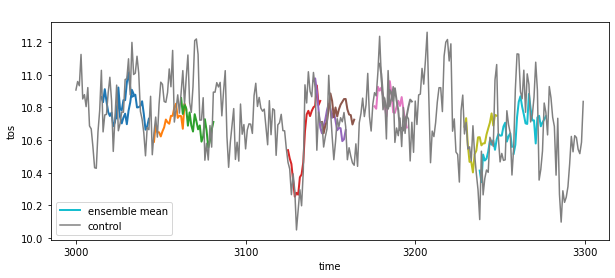

In [4]:
pm.plot()

### Verification

Optionally, `PredictionEnsemble.verify(reference=...)` verifies against reference forecasts (like persistence or historical).

In [5]:
pm = pm.generate_uninitialized()

In [6]:
from climpred.predictability_horizon import predictability_horizon

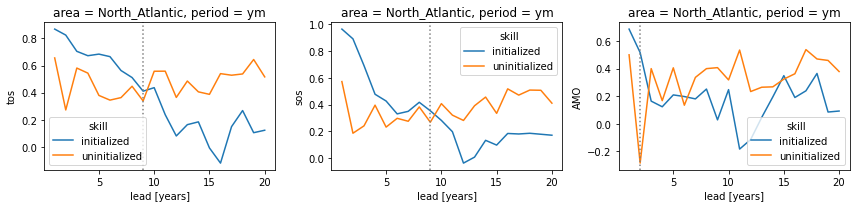

In [7]:
skill = pm.verify(metric='acc', comparison='m2e', dim=['init', 'member'],reference=['uninitialized'])
ph = predictability_horizon(skill.sel(skill='initialized')>skill.sel(skill='uninitialized'))
fig,ax=plt.subplots(ncols=3,figsize=(12,3))
for i,v in enumerate(skill.data_vars):
    fg=skill[v].plot(hue='skill',ax=ax[i])
    # add gray line where initialized > uninitialized
    ax[i].axvline(x=ph[v],c='gray',ls=':', label='predictability horizon')
plt.tight_layout()

### Bootstrapping with Replacement

Here, we bootstrap the ensemble with replacement [Goddard et al. 2013] to compare the initialized ensemble to an "uninitialized" counterpart and a persistence forecast. The visualization is based on those used in [Li et al. 2016]. The p-value demonstrates the probability that the uninitialized or persistence beats the initialized forecast based on N bootstrapping with replacement.

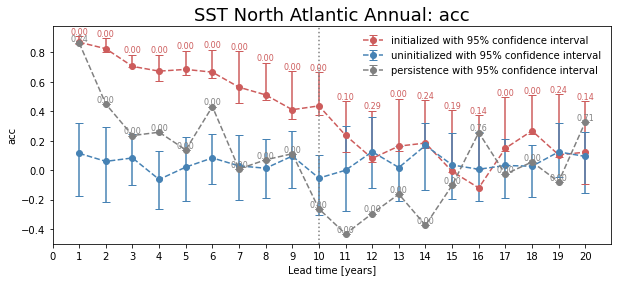

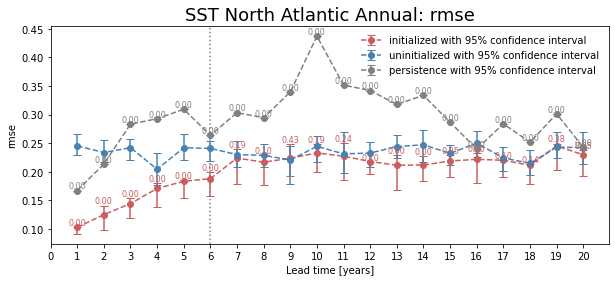

In [8]:
for metric in ['acc', 'rmse']:
    bootstrapped = pm[['tos']].bootstrap(metric=metric, comparison='m2e', dim=['init', 'member'],
                                         iterations=21, sig=95, reference=['uninitialized','persistence'])

    climpred.graphics.plot_bootstrapped_skill_over_leadyear(bootstrapped)
    # add gray line where last lead p <= 0.05
    ph = predictability_horizon(bootstrapped.sel(results='p',skill='uninitialized')<=0.05)
    plt.axvline(x=ph.tos,c='gray',ls=':', label='predictability horizon')
    plt.title(' '.join(['SST', 'North Atlantic', 'Annual:', metric]),fontsize=18)
    plt.ylabel(metric)
    plt.show()

### Computing Skill with Different Comparison Methods

Here, we use `compute_perfect_model` to compute the Anomaly Correlation Coefficient (ACC) with different comparison methods. This generates different ACC values by design. See the [comparisons](https://climpred.readthedocs.io/en/latest/comparisons.html) page for a description of the various ways to compute skill scores for a perfect-model framework.

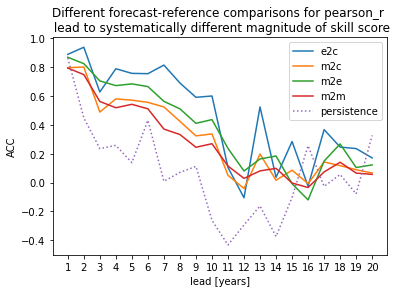

In [9]:
for c in ['e2c','m2c','m2e','m2m']:
    dim = 'init' if c == 'e2c' else ['init', 'member']
    pm.verify(metric='acc', comparison=c, dim=dim)['tos'].plot(label=c)
# Persistence computation for a baseline.
pm.verify(metric='acc', comparison=c, dim=dim, reference='persistence')['tos'].sel(skill= 'persistence').plot(label='persistence', ls=':')
plt.ylabel('ACC')
plt.xticks(np.arange(1,21))
plt.legend()
plt.title('Different forecast-reference comparisons for pearson_r \n lead to systematically different magnitude of skill score')
plt.show()

## 3-dimensional output (maps)

We also have some sample output that contains gridded time series on the curvilinear MPI grid. Our compute functions (`compute_perfect_model`, `compute_persistence`) are indifferent to any dimensions that exist in addition to `init`, `member`, and `lead`. In other words, the functions are set up to make these computations on a grid, if one includes `lat`, `lon`, `lev`, `depth`, etc.

`ds3d`: The ensemble dataset of `members` (1, 2, 3, 4), `inits` (initialization years: 3014, 3061, 3175, 3237), and `lead` years (1, 2, 3, 4, 5).

`control3d`: The control dataset spanning (3000, ..., 3049).

**Note**: These are very small subsets of the actual MPI simulations so that we could host the sample output maps on Github.

In [10]:
# Sea surface temperature
ds3d = climpred.tutorial.load_dataset('MPI-PM-DP-3D')[['tos']]
control3d = climpred.tutorial.load_dataset('MPI-control-3D')[['tos']]

ds3d['lead'].attrs = {'units': 'years'}

In [11]:
# Create climpred PerfectModelEnsemble object.
pm = climpred.PerfectModelEnsemble(ds3d).add_control(control3d).generate_uninitialized()

/Users/aaron.spring/Coding/climpred/climpred/utils.py:141: UserWarning: Assuming annual resolution due to numeric inits. Change init to a datetime if it is another resolution.
  "Assuming annual resolution due to numeric inits. "


### Maps of Skill by Lead Year

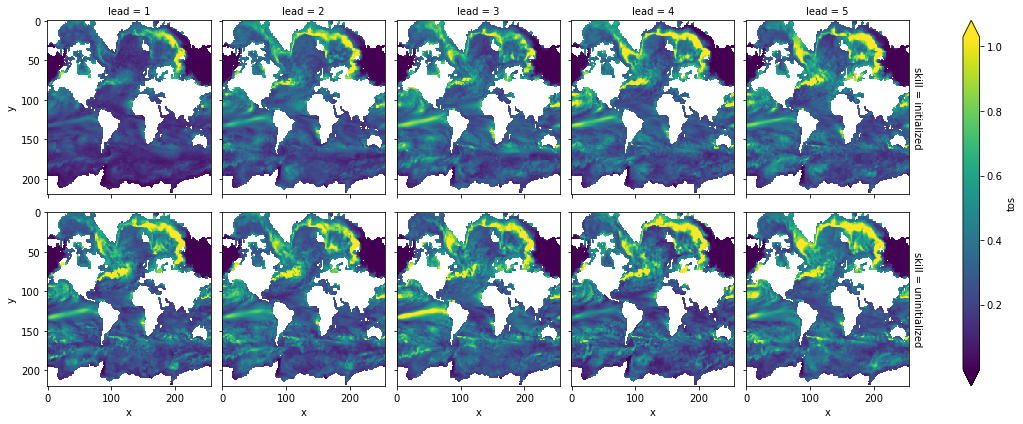

In [16]:
skill = pm.verify(metric='mae', comparison='m2e', dim=['init', 'member'], reference='uninitialized')
skill.tos.T.plot(col='lead', row='skill', yincrease=False, robust=True)

Text(0.5, 1.0, 'Predictable due to initialization for')

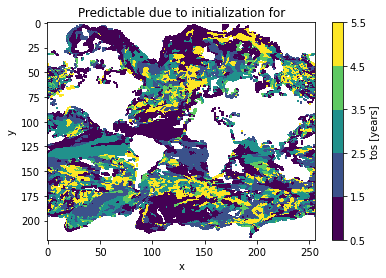

In [17]:
ph = predictability_horizon(skill.sel(skill='initialized')<skill.sel(skill='uninitialized'))

ph.tos.T.plot(yincrease=False,levels=np.arange(0.5,5.51))
plt.title('Predictable due to initialization for')

## References

1. Bushuk, Mitchell, Rym Msadek, Michael Winton, Gabriel Vecchi, Xiaosong Yang, Anthony Rosati, and Rich Gudgel. “Regional Arctic Sea–Ice Prediction: Potential versus Operational Seasonal Forecast Skill.” Climate Dynamics, June 9, 2018. https://doi.org/10/gd7hfq.
1. Collins, Matthew, and Sinha Bablu. “Predictability of Decadal Variations in the Thermohaline Circulation and Climate.” Geophysical Research Letters 30, no. 6 (March 22, 2003). https://doi.org/10/cts3cr.
1. Goddard, Lisa, et al. "A verification framework for interannual-to-decadal predictions experiments." Climate Dynamics 40.1-2 (2013): 245-272.
1. Griffies, S. M., and K. Bryan. “A Predictability Study of Simulated North Atlantic Multidecadal Variability.” Climate Dynamics 13, no. 7–8 (August 1, 1997): 459–87. https://doi.org/10/ch4kc4.
1. Hawkins, Ed, Steffen Tietsche, Jonathan J. Day, Nathanael Melia, Keith Haines, and Sarah Keeley. “Aspects of Designing and Evaluating Seasonal-to-Interannual Arctic Sea-Ice Prediction Systems.” Quarterly Journal of the Royal Meteorological Society 142, no. 695 (January 1, 2016): 672–83. https://doi.org/10/gfb3pn.
1. Li, Hongmei, Tatiana Ilyina, Wolfgang A. Müller, and Frank Sienz. “Decadal Predictions of the North Atlantic CO2 Uptake.” Nature Communications 7 (March 30, 2016): 11076. https://doi.org/10/f8wkrs.
1. Pohlmann, Holger, Michael Botzet, Mojib Latif, Andreas Roesch, Martin Wild, and Peter Tschuck. “Estimating the Decadal Predictability of a Coupled AOGCM.” Journal of Climate 17, no. 22 (November 1, 2004): 4463–72. https://doi.org/10/d2qf62.